# ★ Partial Differential Equations ★

In [98]:
# Import modules
import numpy as np
import scipy
import sympy as sym
from scipy import sparse
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d

from IPython.display import Math
from IPython.display import display

sym.init_printing(use_latex=True)

# 8.1 Parabolic Equations

## Forward Difference Method

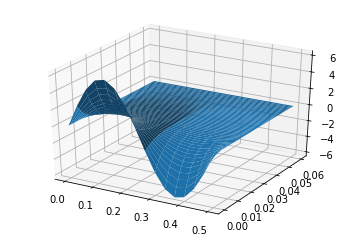

In [370]:
def heatfd(xl, xr, yb, yt, M, N):
    f = lambda x : np.power(np.sin(2 * np.pi * x), 2)
    l = lambda t : 0 * t
    r = lambda t : 0 * t
    D = 1
    h = (xr - xl) / M
    k = (yt - yb) / N
    m = M - 1
    n = N
    sigma = D * k / np.power(h, 2)
    A = np.diag(1 - 2 * sigma * np.ones(m)) + \
        np.diag(sigma * np.ones(m - 1), 1) + \
        np.diag(sigma * np.ones(m - 1), -1) 
        
    lside = l(yb + np.arange(n) * k)
    rside = r(yb + np.arange(n) * k)
    
    x = sym.Symbol('x')
    expr = sym.sin(2 * sym.pi * x) ** 2
    expr = sym.diff(expr, x)
    
    w = np.zeros(n * m).reshape(n, m).astype(np.float128)
    for i in range(m):
        w[0, i] = expr.subs(x, xl + (i + 1) * h).evalf()
    

    for j in range(n - 1):
        ww = np.zeros(m)
        ww[0] = lside[j]
        ww[-1] = rside[j]
        v = np.matmul(A, w[j]) + sigma * ww
        w[j + 1,:] = v
        
    
    w = np.column_stack([lside, w, rside])
    x = np.arange(0, m+2) * h
    t = np.arange(0, n) * k
        
    X, T = np.meshgrid(x, t)
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(X, T, w)
    plt.show()
    plt.clf()

        
heatfd(0, 0.5, 0, 0.06, 15, 2000)

## Backward Difference Method

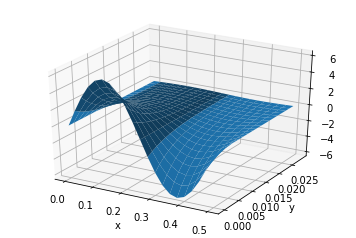

In [44]:
def heatbd(xl, xr, yb, yt, M, N):
    f = lambda x : np.sin(2 * np.pi * x) ** 2
    l = lambda t : 0 * t
    r = lambda t : 0 * t
    h = (xr - xl) / M
    k = (yt - yb) / N
    m = M - 1
    n = N
    D = 1 # diffusion coefficient
    sigma = D * k / (h ** 2)
    
    A = np.diag(1 + 2 * sigma * np.ones(m)) + \
        np.diag(-sigma * np.ones(m - 1), 1) + \
        np.diag(-sigma * np.ones(m - 1), -1) 
        
    lside = l(yb + np.arange(n) * k)
    rside = r(yb + np.arange(n) * k)
    
    ''' Initial conditions ''' 
    x = sym.Symbol('x')
    expr = sym.sin(2 * sym.pi * x) ** 2
    expr = sym.diff(expr, x)
    
    w = np.zeros(n * m).reshape(n, m).astype(np.float128)
    for i in range(m):
        w[0, i] = expr.subs(x, xl + (i + 1) * h).evalf()
        
    for j in range(n - 1):
        ww = np.zeros(m)
        ww[0] = lside[j]
        ww[-1] = rside[j]
        v = np.matmul(np.linalg.inv(A), w[j,:] + sigma * ww)
        w[j + 1,:] = v
        
    w = np.column_stack([lside, w, rside])
    x = np.arange(0, m+2) * h
    t = np.arange(0, n) * k
        
    X, T = np.meshgrid(x, t)
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(X, T, w)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    plt.clf()
    
heatbd(0, 0.5, 0, 0.03, 20, 20)

### Example 

Apply the Backward Difference Method to solve the heat equation

$$
\left\{\begin{matrix}\begin{align*}
& u_t = 4u_{xx}\: & for\:all\:0 \leq x \leq 1\:,0 \leq t \leq 1 \\
& u(x,0) = e^{-x/2}\: & for\:all\:0 \leq x \leq 1 \\
& u(0,t) = e^t\: & for\:all\:0 \leq t \leq 1 \\
& u(1,t) = e^{t-1/2}\: & for\:all\:0 \leq t \leq 1 
\end{align*}\end{matrix}\right.
$$


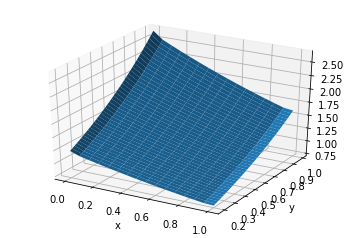

In [82]:
def heatbd(xl, xr, yb, yt, M, N):
    l = lambda t : np.exp(t)
    r = lambda t : np.exp(t - 0.5)
    h = (xr - xl) / M
    k = (yt - yb) / N
    m = M - 1
    n = N
    D = 4 # diffusion coefficient
    sigma = D * k / (h ** 2)
    
    A = np.diag(1 + 2 * sigma * np.ones(m)) + \
        np.diag(-sigma * np.ones(m - 1), 1) + \
        np.diag(-sigma * np.ones(m - 1), -1) 
        
    lside = l(yb + np.arange(n) * k)
    rside = r(yb + np.arange(n) * k)
    
    ''' Initial conditions ''' 
    x = sym.Symbol('x')
    expr = sym.exp(-x / 2)
    expr = sym.diff(expr, x)
    
    w = np.zeros(n * m).reshape(n, m).astype(np.float128)
    for i in range(m):
        w[0, i] = expr.subs(x, xl + (i + 1) * h).evalf()
        
    for j in range(n - 1):
        ww = np.zeros(m)
        ww[0] = lside[j]
        ww[-1] = rside[j]
        v = np.matmul(np.linalg.inv(A), w[j,:] + sigma * ww)
        w[j + 1,:] = v
        
    w = np.column_stack([lside, w, rside])
    x = np.arange(0, m+2) * h
    t = np.arange(0, n) * k
        
    X, T = np.meshgrid(x, t)
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    stride = 10
    ax.plot_surface(X[stride:], T[stride:], w[stride:])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    plt.clf()
    
heatbd(0, 1, 0, 1, 15, 50)

### Example

Apply the Backward Difference Method to solve the heat equation with homogeneous Neumann boundary conditions

$$
\left\{\begin{matrix}\begin{align*}
& u_t = u_{xx}\: & for\:all\:0 \leq x \leq 1\:,0 \leq t \leq 1 \\
& u(x,0) = \sin^2{2\pi x}\: & for\:all\:0 \leq x \leq 1 \\
& u(0,t) = 0\: & for\:all\:0 \leq t \leq 1 \\
& u(1,t) = 0\: & for\:all\:0 \leq t \leq 1 
\end{align*}\end{matrix}\right.
$$


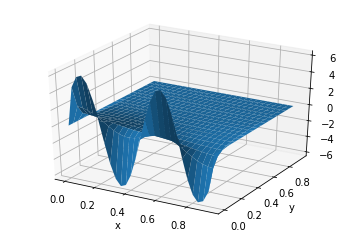

In [128]:
def heatbdn(xl, xr, yb, yt, M, N):
    h = (xr - xl) / M
    k = (yt - yb) / N
    m = M - 1
    n = N
    D = 1 # diffusion coefficient
    sigma = D * k / (h ** 2)
    
    A = np.diag(1 + 2 * sigma * np.ones(m)) + \
        np.diag(-sigma * np.ones(m - 1), 1) + \
        np.diag(-sigma * np.ones(m - 1), -1) 
    
    A[0,:3] = np.array([-3, 4, -1])
    A[-1,-3:] = np.array([-1, 4, -3])
    
    
    ''' Initial conditions ''' 
    x = sym.Symbol('x')
    expr = sym.sin(2 * sym.pi * x) ** 2
    expr = sym.diff(expr, x)
    
    w = np.zeros(n * m).reshape(n, m).astype(np.float128)
    for i in range(m):
        w[0, i] = expr.subs(x, xl + (i + 1) * h).evalf()
        
    for j in range(n - 1):
        b = w[j,:]
        b[0] = 0
        b[-1] = 0
        w[j + 1,:] = np.matmul(np.linalg.inv(A), b)
        
    x = np.arange(0, m) * h
    t = np.arange(0, n) * k
        
    X, T = np.meshgrid(x, t)
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    stride = 0
    ax.plot_surface(X[stride:], T[stride:], w[stride:])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    plt.clf()
    
heatbdn(0, 1, 0, 1, 30, 20)